# Nanowire Model
Hamiltonian of a Nanowire as proposed by Lutchyn et. al.
\begin{equation}
  H_0 = \frac{p^2_x}{2m^*} - \mu - \frac{\alpha_R}{\hbar}\sigma_y p_x + B \sigma_x
\end{equation}

The parameters are defined by the material of the nanowire. Typical values for $InSb$ are

\begin{align}
  &m^* = 0.015m_e\\
  &\alpha = 0,2\: eV.Å  =  20\: meV . nm
\end{align}

The thight-binding model is given in two terms: the frist term corresponds to onsite interacions such as chemial potential, Zeeman splitting and kinect energy; the second term considers interacting neighbor sites so that spin-orbit-coupling, superconductivity and the hopping factor contributes to the hamiltonian.

\begin{equation}
  H_0 = 
  \sum_i c_i^\dagger h c_i
  +\sum_{\langle ij \rangle} c_i^\dagger v c_j
  +H.c.
\end{equation}

In wich the parameters are

\begin{align}
  &h = (2t-\mu)\sigma_0 + B\sigma_x\\
  &v = -t\sigma_0 + it_{SO}\sigma_y\\
  &t = \frac{\hbar^2}{2m^* a^2}
  \quad ,\quad
  t_{SO} = \frac{\alpha_R}{2a}
  \ →\ \text{params. de hopping}
\end{align}

Wich can be written as matrices
\begin{align}
  &h_{ii} \equiv h = 
    \begin{bmatrix}
        2t-\mu & B \\
        B & 2t-\mu
    \end{bmatrix}\\
  &h_{i+1,i}\equiv v = 
    \begin{bmatrix}
      -t & \frac{\hbar}{2a}\alpha_{SO} \\
      -\frac{\hbar}{2a}\alpha_{SO}  & -t
    \end{bmatrix}
    =h_{i+1,i}^\dagger
\end{align}

And the Zeeman field is defined by the critical magnetic field $B \equiv \sqrt{\mu^2 + \Delta^2}$ \\
---


In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [ ]:
######## DEFINES DISCRETE HAMILTONIAN ########
    ############# 2Nx2N ############# 

# mu = 0.00
# t = Delta = 1.00
# rashba = 0.01

def nanowireH(N, t, Delta, mu, rashba):
  hop = 2.00 * t - mu

  Z = np.sqrt(mu**2 + Delta**2)+1

  A = np.matrix([[hop, Z],[Z, hop]])
  # print(A)
  B = np.matrix([[-t + Delta, rashba],[-rashba, -t + Delta]])
  # print(B)

  H = np.zeros([2*N, 2*N])

  for i in range(0, 2*N, 2):
      # H[i,i] = 1
      # H[i,i+1] = 1
      H[i, i:i+2] = np.add(A[0],B[0])
      # H[i, i:i+2] = A[0]
      
      # H[i+1,i] = 1
      # H[i+1,i+1] = 1
      H[i+1, i: i+2] = np.add(A[1],B[1])
      # H[i, i:i+2] = A[1]
      

    #---------- FIRST NEIGHBORS ------------#
      if (i < 2*N-2):
          j = i + 2
          # print("i = ", i, " j = ", j)
          # H[i, j:j+2] = [-1, -1]
          H[i, j:j+2] = B[0]
          
          # H[i+1,j:j+2] = [-1,-1]
          H[i+1,j:j+2] = B[1]
      
      if (i > 1):
          j = i - 2
          # print("i = ", i, " j = ", j)
          # H[i, j:j+2] = -1
          H[i, j:j+2] = -B[0]
          
          # H[i+1,j:j+2] = -1
          H[i+1,j:j+2] = -B[1]
    #=======================================#

    #---------- SECOND NEIGHBORS ------------# 
      # if (i < 2*N-4):
      #     j = i + 4
      #     # print("i = ", i, " j = ", j)
      #     # H[i, j:j+2] = -2
      #     H[i, j:j+2] = B[0]*0.5
          
      #     # H[i+1,j:j+2] = -2
      #     H[i+1,j:j+2] = B[1]*0.5

      # if (i > 4):
      #     j = i - 4
      #     # print("i = ", i, " j = ", j)
      #     # H[i, j:j+2] = -2
      #     H[i, j:j+2] = -B[0]*0.5
          
      #     # H[i+1,j:j+2] = -2
      #     H[i+1,j:j+2] = -B[1]*0.5
    #=======================================#
    
  return H

[18]


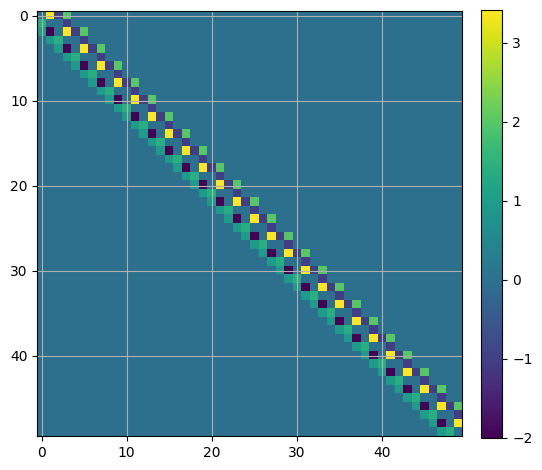

In [ ]:
#===== PARAMETERS =====#
N = 25          # sites
t = Delta = 1.0 # superconductivity
mu = 1.0        # onsite potential (chemical potencial)
rashba = 1      # SOC

H = nanowireH(N, t, Delta, mu, rashba)
evals, evecs = np.linalg.eigh(H)
# print(evals)

#====== FIND EIGENVALS =========#
maj_index = np.where(np.abs(evals) <= 0.1)[0]
print(maj_index)
majModes = 0
for i in range(len(maj_index)):
  majModes += np.abs(evecs[:, maj_index[i]])**2


triv_index = np.where(np.abs(evals) > 1e-4)[0]
trivModes = 0
for i in range(len(triv_index)): 
  trivModes += np.abs(evecs[:, triv_index[i]])**2

# print(majModes)



################## GRAPH ###################

fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(H)
plt.colorbar(fraction=0.046, pad=0.04)
plt.grid()
plt.show()

# fig4, axs= plt.subplots(figsize = (8, 6))
# axs.plot(np.arange(N)+1, majModes, color='red')
# plt.show()



# Reciprocal Space

With the Kitaev hamiltonian on reciproval space (by BdG transformation and Cloch theorem)
\begin{align}
  H = (-2t\cos k - \mu)\tau_z - 2\Delta\sin k \: \tau_y
\end{align} 


We take a density of states wich represents a semiconductor (based on topological materials) by taking $\mu \rightarrow \mu - 2t$ and expanding
\begin{align}
  &\cos k \approx 1-k^2/2 \approx 1\\
  &\sin k \approx k
\end{align} 

And the new hamiltonian  is
\begin{equation}
  H(k) = \left(\frac{k^2}{2m} 
    - \mu\right)\tau_z +2\Delta k\tau_y 
\end{equation}

Wich the energy follows

\begin{equation}
  E = \pm 
    \sqrt{\left( \frac{k^2}{2m}-\mu\right)^2 
      +4\Delta^2 k^2 }
\end{equation}

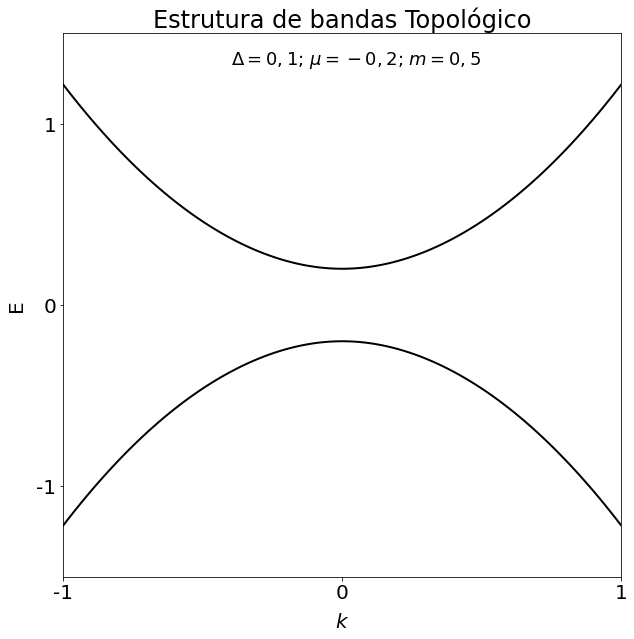

In [ ]:
########### KITAEV SEMICONDUCTOR #############
import numpy as np
import matplotlib.pyplot as plt

t = delta = 0.1
mu = -0.2
m = 0.5
k = np.linspace(-1, 1, 101)

E = np.empty([len(k)])
for i in range(len(k)):
  E[i] = np.sqrt(((k[i]**2) / (2*m) - mu)**2 +  (2*delta * k[i])**2 )


Esym = -E

############### GRAPHING ###############
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(k, E, c = 'black', lw = 2)
ax.plot(k, Esym, c = 'black', lw = 2)

ax.set_xlim(-1, 1)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks([-1,0, 1])
ax.set_yticks([-1,0, 1])
ax.set_xticklabels(['-1','0', '1'], fontsize = 20)
ax.set_yticklabels(['-1','0', '1'], fontsize = 20)

ax.set_title('Estrutura de bandas Topológico', fontsize = 24)
ax.set_xlabel('$k$', fontsize = 20, labelpad = 10)
ax.set_ylabel('E', fontsize = 20, labelpad = 10)

################# textbox #######################
textstr = '; '.join((r'$\Delta = 0,1$',
                      r'$\mu = -0,2$',
                      r'$m = 0,5$'))

ax.text(0.30, 0.97, 
        textstr, 
        transform=ax.transAxes, 
        fontsize=18,
        verticalalignment='top')
##########################
plt.show()

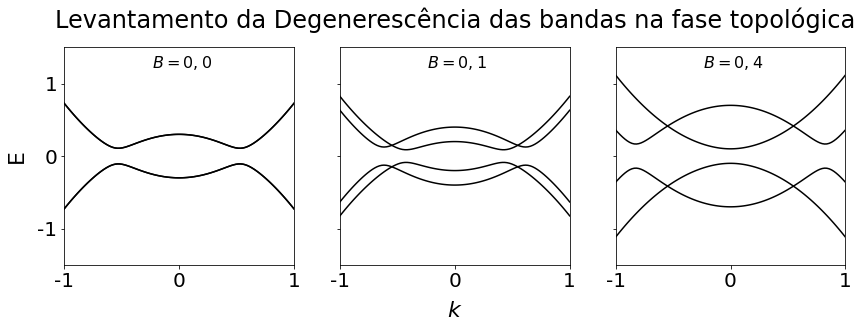

In [ ]:
############# ZEEMAN FIELD ######################

import numpy as np
import matplotlib.pyplot as plt


######## GRAPH 01########
t = delta = 0.1
mu = 0.3
m = 0.5
B1 = 0.0
B2 = -B1
k = np.linspace(-1, 1, 100)

E1 = np.empty([len(k)])
E2 = np.empty([len(k)])
for i in range(len(k)):
  E1[i] = np.sqrt(((k[i]**2) / (2*m) - mu - B1)**2 + (2*delta*k[i])**2)
  E2[i] = np.sqrt(((k[i]**2) / (2*m) - mu - B2)**2 + (2*delta*k[i])**2)

E1sym = -E1
E2sym = -E2

fig, ax = plt.subplots(1,3, sharey = True, figsize=(14,4))
ax[0].plot(k, E1, c = 'black', lw = 1.5)
ax[0].plot(k, E2, c = 'black', lw = 1.5)
ax[0].plot(k, E1sym, c = 'black', lw = 1.5)
ax[0].plot(k, E2sym, c = 'black', lw = 1.5)


######## GRAPH 02 ########
B1 = 0.1
B2 = -B1
for i in range(len(k)):
  E1[i] = np.sqrt(((k[i]**2) / (2*m) - mu - B1)**2 + (2*delta*k[i])**2)
  E2[i] = np.sqrt(((k[i]**2) / (2*m) - mu - B2)**2 + (2*delta*k[i])**2)

E1sym = -E1
E2sym = -E2

ax[1].plot(k, E1, c = 'black', lw = 1.5)
ax[1].plot(k, E2, c = 'black', lw = 1.5)
ax[1].plot(k, E1sym, c = 'black', lw = 1.5)
ax[1].plot(k, E2sym, c = 'black', lw = 1.5)


######## graph  03 ########
B1 = 0.4
B2 = -B1
for i in range(len(k)):
  E1[i] = np.sqrt(((k[i]**2) / (2*m) - mu - B1)**2 + (2*delta*k[i])**2)
  E2[i] = np.sqrt(((k[i]**2) / (2*m) - mu - B2)**2 + (2*delta*k[i])**2)

E1sym = -E1
E2sym = -E2

ax[2].plot(k, E1, c = 'black', lw = 1.5)
ax[2].plot(k, E2, c = 'black', lw = 1.5)
ax[2].plot(k, E1sym, c = 'black', lw = 1.5)
ax[2].plot(k, E2sym, c = 'black', lw = 1.5)


############# GERAL #############
textstr = [(r'$B = 0,0$'),
            (r'$B = 0,1$'),
            (r'$B = 0,4$')]
for i in range(len(ax)):
  ax[i].set_xlim(-1, 1)
  ax[i].set_ylim(-1.5, 1.5)
  ax[i].set_xticks([-1,0, 1])
  ax[i].set_yticks([-1,0, 1])
  ax[i].set_xticklabels(['-1','0', '1'], fontsize = 20)
  ax[i].set_yticklabels(['-1','0', '1'], fontsize = 20)
  ################# textbox #######################
  ax[i].text(0.38, 0.97, 
          textstr[i], 
          transform=ax[i].transAxes, 
          fontsize=16,
          verticalalignment='top')
  ##########################


ax[1].set_title('Levantamento da Degenerescência das bandas na fase topológica', fontsize = 24, pad = 20)
ax[1].set_xlabel('$k$', fontsize = 22, labelpad = 10)
ax[0].set_ylabel('E', fontsize = 22, labelpad = 10)
# plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

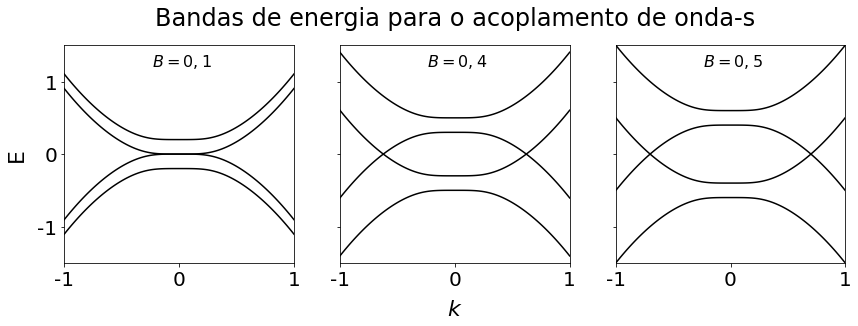

In [ ]:
########## P-WAVE ############

import numpy as np
import matplotlib.pyplot as plt


######## GRAPH 01 ########
t = delta = 0.1
mu = 0.0
m = 0.5
B1 = np.array([0.1, 0.4, 0.5])
B2 = -B1
k = np.linspace(-1, 1, 100)

E1 = np.empty([len(k)])
E2 = np.empty([len(k)])
for i in range(len(k)):
  E1[i] = np.sqrt(((k[i]**2) / (2*m) - mu)**2 + (delta)**2) + B1[0]
  E2[i] = np.sqrt(((k[i]**2) / (2*m) - mu)**2 + (delta)**2) + B2[0]

E1sym = -E1
E2sym = -E2

fig, ax = plt.subplots(1,3, sharey = True, figsize=(14,4))
ax[0].plot(k, E1, c = 'black', lw = 1.5)
ax[0].plot(k, E2, c = 'black', lw = 1.5)
ax[0].plot(k, E1sym, c = 'black', lw = 1.5)
ax[0].plot(k, E2sym, c = 'black', lw = 1.5)


######## GRAPH 02 ########
for i in range(len(k)):
  E1[i] = np.sqrt(((k[i]**2) / (2*m) - mu)**2 + (delta)**2) + B1[1]
  E2[i] = np.sqrt(((k[i]**2) / (2*m) - mu)**2 + (delta)**2) + B2[1]

E1sym = -E1
E2sym = -E2

ax[1].plot(k, E1, c = 'black', lw = 1.5)
ax[1].plot(k, E2, c = 'black', lw = 1.5)
ax[1].plot(k, E1sym, c = 'black', lw = 1.5)
ax[1].plot(k, E2sym, c = 'black', lw = 1.5)


######## GRAPH 03 ########
for i in range(len(k)):
  E1[i] = np.sqrt(((k[i]**2) / (2*m) - mu)**2 + (delta)**2) + B1[2] 
  E2[i] = np.sqrt(((k[i]**2) / (2*m) - mu)**2 + (delta)**2) - B1[2] 

E1sym = -E1
E2sym = -E2

ax[2].plot(k, E1, c = 'black', lw = 1.5)
ax[2].plot(k, E2, c = 'black', lw = 1.5)
ax[2].plot(k, E1sym, c = 'black', lw = 1.5)
ax[2].plot(k, E2sym, c = 'black', lw = 1.5)


############# GERAL #############
textstr = [(r'$B = 0,1$'),
            (r'$B = 0,4$'),
            (r'$B = 0,5$')]
for i in range(len(ax)):
  ax[i].set_xlim(-1, 1)
  ax[i].set_ylim(-1.5, 1.5)
  ax[i].set_xticks([-1,0, 1])
  ax[i].set_yticks([-1,0, 1])
  ax[i].set_xticklabels(['-1','0', '1'], fontsize = 20)
  ax[i].set_yticklabels(['-1','0', '1'], fontsize = 20)
  ################# textbox #######################
  ax[i].text(0.38, 0.97, 
          textstr[i], 
          transform=ax[i].transAxes, 
          fontsize=16,
          verticalalignment='top')
  ##########################


ax[1].set_title('Bandas de energia para o acoplamento de onda-s', fontsize = 24, pad = 20)
ax[1].set_xlabel('$k$', fontsize = 22, labelpad = 10)
ax[0].set_ylabel('E', fontsize = 22, labelpad = 10)
# plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


[Text(0, 0, '-1'), Text(0, 0, '0'), Text(0, 0, '1')]

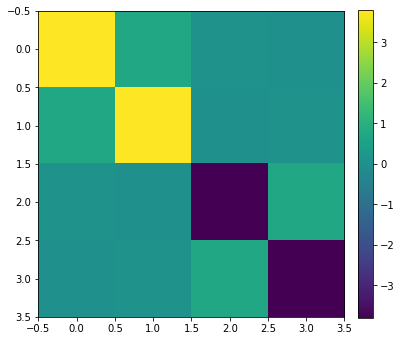

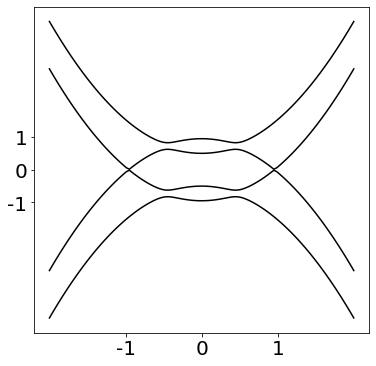

In [ ]:
########## RASHBA ############

import numpy as np
import matplotlib.pyplot as plt


def nanoH(delta, mu, B, rashba):
  H = np.zeros([4,4])

  k = np.linspace(-2, 2, 100)

  sys = np.array([])
  m = 0.5

  for i in range(len(k)):
    H[0,0] = k[i]**2 / (2*m) - mu
    H[1,1] = k[i]**2 / (2*m) - mu
    H[0,1] = -rashba*k[i] + B
    H[1,0] = rashba*k[i] + B

    H[2,2] = - (k[i]**2 / (2*m) - mu)
    H[3,3] = - (k[i]**2 / (2*m) - mu)
    H[2,3] = rashba*k[i] + B
    H[3,2] = -rashba*k[i] + B

    H[0, 2] = delta
    H[1,-1] = delta
    H[2, 0] = delta
    H[-1,1] = delta

    sys = np.append(sys, H)

  return k, H, sys.reshape(len(k), 4, 4)


delta = 0.1
mu = 0.2
B = np.sqrt(mu**2 + delta**2)+0.5
rashba = B*1j

k, H, sys = nanoH(delta, mu, B, rashba)


fig1, ax = plt.subplots(figsize = (6,6))
ax = ax.imshow(sys[0])
plt.colorbar(ax, fraction=0.046, pad=0.04)


evals, evecs = np.linalg.eigh(sys)

fig2, ax = plt.subplots(figsize = (6,6))

for i in range(len(evals[0])):
  ax.plot(k, evals[:, i], c='black')

# ax.set_xlim(-1, 1)
# ax.set_ylim(-1.5, 1.5)
ax.set_xticks([-1,0, 1])
ax.set_yticks([-1,0, 1])
ax.set_xticklabels(['-1','0', '1'], fontsize = 20)
ax.set_yticklabels(['-1','0', '1'], fontsize = 20)
# ax.grid()

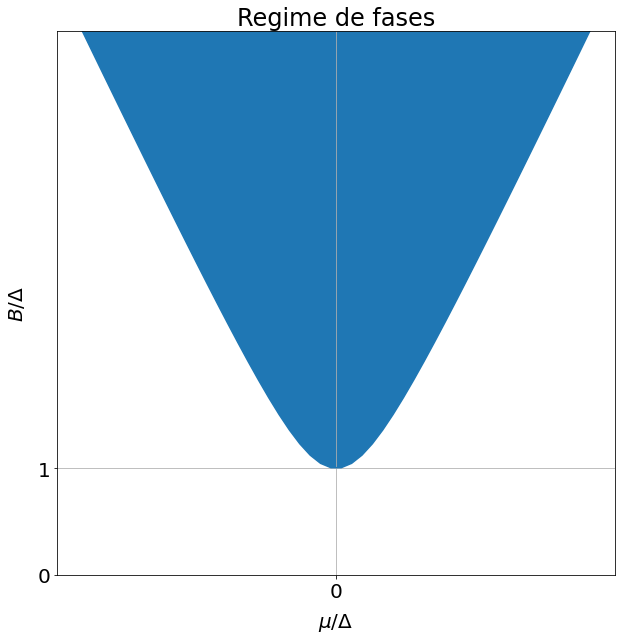

In [ ]:
############## CAMPO CRÍTICO ##############

import numpy as np
import matplotlib.pyplot as plt


Delta = 1
mu = np.linspace(-5,5)

B = [np.sqrt(Delta**2 + mu[i]**2) for i in range(len(mu))]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(mu, B, lw = 1.5)
ax.fill(mu, B)

ax.set_ylim(0, 5.1)
ax.set_yticks([0, 1])
ax.set_xticks([0])
ax.grid()
ax.set_xticklabels(['0'], fontsize = 20)
ax.set_yticklabels(['0', '1'], fontsize = 20)

ax.set_title('Regime de fases', fontsize = 24)
ax.set_xlabel('$\mu / \Delta$', fontsize = 20, labelpad = 10)
ax.set_ylabel('$B / \Delta$', fontsize = 20, labelpad = 10)

plt.show()